In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:00


# TRX-USD

In [4]:
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/TRX-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

## 7:2:1

In [5]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-10799.776, Time=7.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10804.672, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10803.055, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10802.932, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10806.438, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10801.031, Time=1.89 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 11.148 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# # 6. Quá trình tạo index predict 30 ngày tiếp theo
# last_index =  df.index[-1]
# last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# # Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# # Print the predicted closing prices for the next 30 days
# print('Predicted closing prices for the next 30 days:')
# print(y_next_30_days)

In [8]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE
valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation MAE:', valid_mae)
print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)

print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Validation MAE: 0.03333051823850333
Validation RMSE: 0.03413849942542834
Validation MAPE: 54.29882525536347
Testing MAE: 0.02688394863130731
Testing RMSE: 0.029174545099743824
Testing MAPE: 41.36501393749239


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Train')
plt.plot(test_data['Date'], test_data['Close'], label='Test')

plt.plot(test_data['Date'], y_pred, label='Pred_Test')
plt.plot(val_data['Date'], val_data['Close'], label='Validate')
plt.plot(val_data['Date'], y_pred_val, label='Pred_Val')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMAX Predictions')
plt.show()

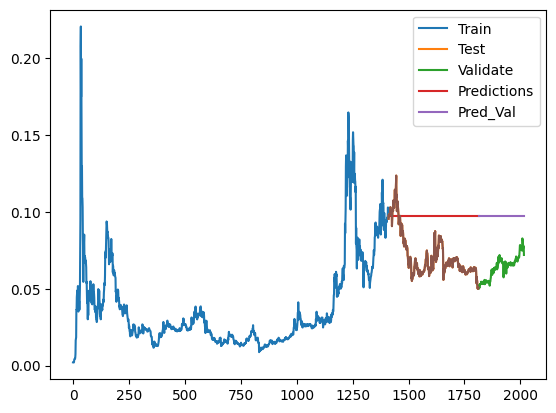

In [10]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(test_data.index, test_data['Close'])
# plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Pred_Val'])
plt.show()

In [11]:
test_data.index

RangeIndex(start=1411, stop=1814, step=1)

## 5:3:2

In [12]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

# 3. Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [13]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train1, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7804.328, Time=2.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7749.881, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7753.469, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7753.165, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7751.823, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7808.144, Time=2.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7747.564, Time=1.84 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7745.880, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-7872.431, Time=2.74 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-7850.662, Time=1.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-7880.762, Time=2.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-7880.316, Time=2.77 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-7886.439, Time=1.81 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-7888.373, Time=3.94 sec
 ARIMA(0,1,4)(0,0,0

ARIMA(order=(1, 1, 5), scoring_args={}, suppress_warnings=True)

In [14]:
# 4. Quá trình testing
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(n_periods=len(y_test1))

# 5. Quá trình Validate
x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1['Close'])
y_pred_val1 =  model.predict(n_periods=len(y_val1))

In [ ]:
# # 6. Quá trình tạo index predict 30 ngày tiếp theo
# last_index1 =  df.index[-1]
# last_data1 = pd.RangeIndex(start=last_index1, stop=last_index1+30, step=1)

# # Create an array of 30 consecutive integers starting from last_index
# x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)

# # Predict the closing prices for the next 30 days
# y_next1_30_days = model.predict(n_periods=len(x_next1_30_days))

# # Print the predicted closing prices for the next 30 days
# print('Predicted closing prices for the next 30 days:')
# print(y_next1_30_days)

In [15]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - y_val1)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))

# Tính MAE
valid_mae1 = mean_absolute_error(y_val1, y_pred_val1)
test_mae1 = mean_absolute_error(y_test1, y_pred1)

# Tính MAPE
def mean_absolute_percentage_error(y_true1, y_pred1):
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100

valid_mape1 = mean_absolute_percentage_error(y_val1, y_pred_val1)
test_mape1 = mean_absolute_percentage_error(y_test1, y_pred1)

print('Validation MAE:', valid_mae1)
print('Validation RMSE:', valid_rmse1)
print('Validation MAPE:', valid_mape1)

print('Testing MAE:', test_mae1)
print('Testing RMSE:', test_rmse1)
print('Testing MAPE:', test_mape1)

Validation MAE: 0.01740492206864005
Validation RMSE: 0.01961323551810967
Validation MAPE: 25.641875436145618
Testing MAE: 0.023177544763022237
Testing RMSE: 0.03194237673578885
Testing MAPE: 33.77756626182164


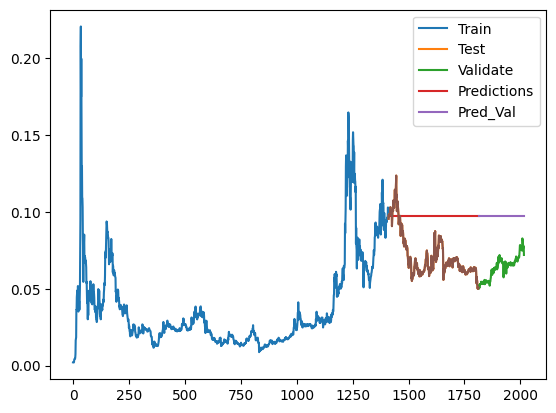

In [16]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(test_data.index, test_data['Close'])
# plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Pred_Val'])
plt.show()


# DOGE-USD

In [20]:
df1 = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/DOGE-USD.csv')
df1 = df1[['Close']]
df1 = df1.dropna() # Drop missing values
df1 = df1.reset_index(drop=True) # Reset the index

## 7:2:1

In [21]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [22]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8187.891, Time=3.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8161.669, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8182.490, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8178.693, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8163.460, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8211.213, Time=2.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8199.423, Time=1.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8183.319, Time=1.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-8235.037, Time=2.88 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-8237.062, Time=4.46 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-8235.027, Time=1.95 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-8239.603, Time=3.44 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-8270.552, Time=3.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-8269.645, Time=5.57 sec
 ARIMA(3,1,4)(0,0,0

ARIMA(order=(5, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [23]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# # 6. Quá trình tạo index predict 30 ngày tiếp theo
# last_index =  df.index[-1]
# last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# # Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# # Print the predicted closing prices for the next 30 days
# print('Predicted closing prices for the next 30 days:')
# print(y_next_30_days)

In [24]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE
valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation MAE:', valid_mae)
print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)

print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Validation MAE: 0.15280945584384223
Validation RMSE: 0.1530625030339307
Validation MAPE: 192.46193948104238
Testing MAE: 0.11406471719226087
Testing RMSE: 0.12560851169220646
Testing MAPE: 137.83206383802792


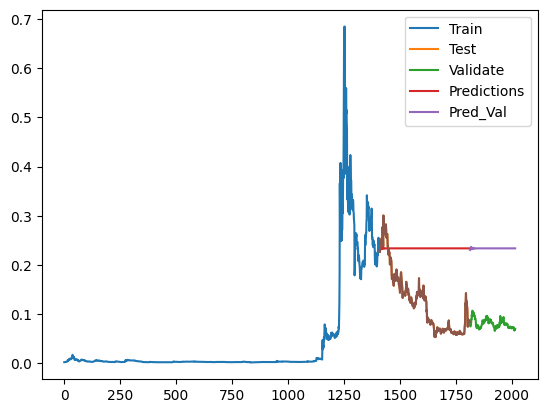

In [25]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(test_data.index, test_data['Close'])
# plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Pred_Val'])
plt.show()

In [26]:
test_data.index

RangeIndex(start=1411, stop=1814, step=1)

## 5:3:2

In [27]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size1 = int(0.5 * len(df1))
test_size1 = int(0.3 * len(df1))
val_size1 = len(df1) - train_size1 - test_size1

train_data1 = df1[:train_size1]
test_data1 = df1[train_size1:train_size1+test_size1]
val_data1 = df1[train_size1+test_size1:]

# 3. Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [28]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train1, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13331.584, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13325.688, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13343.252, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13343.617, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13327.683, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13341.589, Time=0.76 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-13340.981, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13344.336, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-13339.416, Time=1.78 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-13340.236, Time=1.45 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13319.537, Time=0.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-13336.925, Time=3.90 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-13346.107, Time=0.64 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-13342.983, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-13343.583, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-13333.709, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-13341.419, Time=0.94 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-13345.617, Time=0.29 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-13342.243, Time=0.66 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-13321.541, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-13338.935, Time=0.92 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 17.079 seconds


ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [29]:
# 4. Quá trình testing
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(n_periods=len(y_test1))

# 5. Quá trình Validate
x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1['Close'])
y_pred_val1 =  model.predict(n_periods=len(y_val1))

In [ ]:
# # 6. Quá trình tạo index predict 30 ngày tiếp theo
# last_index1 =  df.index[-1]
# last_data1 = pd.RangeIndex(start=last_index1, stop=last_index1+30, step=1)

# # Create an array of 30 consecutive integers starting from last_index
# x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)

# # Predict the closing prices for the next 30 days
# y_next1_30_days = model.predict(n_periods=len(x_next1_30_days))

# # Print the predicted closing prices for the next 30 days
# print('Predicted closing prices for the next 30 days:')
# print(y_next1_30_days)

In [30]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - y_val1)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))

# Tính MAE
valid_mae1 = mean_absolute_error(y_val1, y_pred_val1)
test_mae1 = mean_absolute_error(y_test1, y_pred1)

# Tính MAPE
def mean_absolute_percentage_error(y_true1, y_pred1):
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100

valid_mape1 = mean_absolute_percentage_error(y_val1, y_pred_val1)
test_mape1 = mean_absolute_percentage_error(y_test1, y_pred1)

print('Validation MAE:', valid_mae1)
print('Validation RMSE:', valid_rmse1)
print('Validation MAPE:', valid_mape1)

print('Testing MAE:', test_mae1)
print('Testing RMSE:', test_rmse1)
print('Testing MAPE:', test_mape1)

Validation MAE: 0.07486577882576353
Validation RMSE: 0.07633069504329491
Validation MAPE: 96.33261160121253
Testing MAE: 0.1496214063292862
Testing RMSE: 0.19530461922396367
Testing MAPE: 79.6156386993264


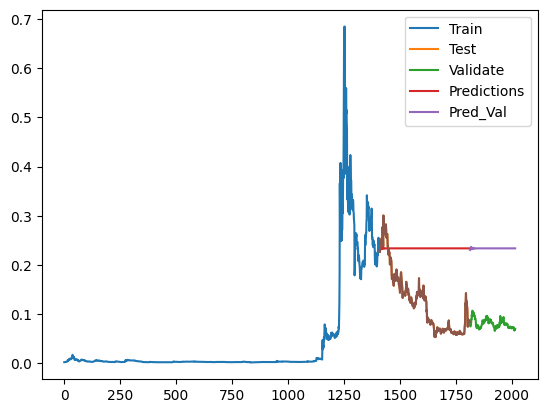

In [31]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(test_data.index, test_data['Close'])
# plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Pred_Val'])
plt.show()


# XRP-USD

In [33]:
df2 = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/XRP-USD.csv')
df2 = df2[['Close']]
df2 = df2.dropna() # Drop missing values
df2 = df2.reset_index(drop=True) # Reset the index

## 7:2:1

In [34]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df2))
test_size = int(0.2 * len(df2))
val_size = len(df2) - train_size - test_size

train_data = df2[:train_size]
test_data = df2[train_size:train_size+test_size]
val_data = df2[train_size+test_size:]

In [35]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3766.853, Time=3.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3767.257, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3766.162, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3766.093, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3769.120, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3764.126, Time=0.69 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.185 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [36]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# # 6. Quá trình tạo index predict 30 ngày tiếp theo
# last_index =  df.index[-1]
# last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# # Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# # Print the predicted closing prices for the next 30 days
# print('Predicted closing prices for the next 30 days:')
# print(y_next_30_days)

In [37]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE
valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation MAE:', valid_mae)
print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)

print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Validation MAE: 0.7170062057784038
Validation RMSE: 0.7192476158471763
Validation MAPE: 175.0625179139237
Testing MAE: 0.5135748962462688
Testing RMSE: 0.5725283886838894
Testing MAPE: 115.18930490427923


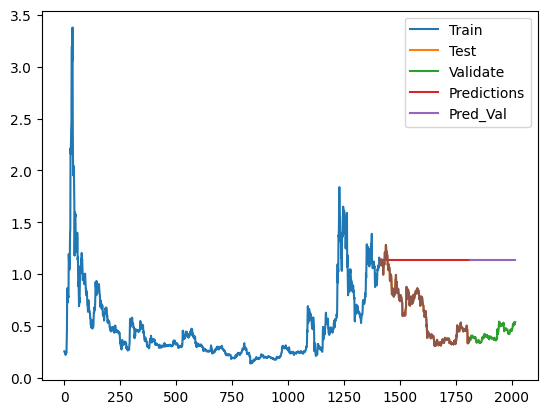

In [38]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(test_data.index, test_data['Close'])
# plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Pred_Val'])
plt.show()

In [39]:
test_data.index

RangeIndex(start=1411, stop=1814, step=1)

## 5:3:2

In [40]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size1 = int(0.5 * len(df2))
test_size1 = int(0.3 * len(df2))
val_size1 = len(df2) - train_size1 - test_size1

train_data1 = df2[:train_size1]
test_data1 = df2[train_size1:train_size1+test_size1]
val_data1 = df2[train_size1+test_size1:]

# 3. Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [41]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train1, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2791.835, Time=1.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2786.874, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2790.418, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2789.927, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2788.874, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2793.890, Time=1.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2790.119, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2795.781, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2787.134, Time=1.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2790.838, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2797.784, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2791.927, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2792.418, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-2795.886, Time=0.92 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [42]:
# 4. Quá trình testing
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(n_periods=len(y_test1))

# 5. Quá trình Validate
x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1['Close'])
y_pred_val1 =  model.predict(n_periods=len(y_val1))

In [ ]:
# # 6. Quá trình tạo index predict 30 ngày tiếp theo
# last_index1 =  df.index[-1]
# last_data1 = pd.RangeIndex(start=last_index1, stop=last_index1+30, step=1)

# # Create an array of 30 consecutive integers starting from last_index
# x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)

# # Predict the closing prices for the next 30 days
# y_next1_30_days = model.predict(n_periods=len(x_next1_30_days))

# # Print the predicted closing prices for the next 30 days
# print('Predicted closing prices for the next 30 days:')
# print(y_next1_30_days)

In [43]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - y_val1)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))

# Tính MAE
valid_mae1 = mean_absolute_error(y_val1, y_pred_val1)
test_mae1 = mean_absolute_error(y_test1, y_pred1)

# Tính MAPE
def mean_absolute_percentage_error(y_true1, y_pred1):
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100

valid_mape1 = mean_absolute_percentage_error(y_val1, y_pred_val1)
test_mape1 = mean_absolute_percentage_error(y_test1, y_pred1)

print('Validation MAE:', valid_mae1)
print('Validation RMSE:', valid_rmse1)
print('Validation MAPE:', valid_mape1)

print('Testing MAE:', test_mae1)
print('Testing RMSE:', test_rmse1)
print('Testing MAPE:', test_mape1)

Validation MAE: 0.17559500958564833
Validation RMSE: 0.18673291707923512
Validation MAPE: 41.51009226520968
Testing MAE: 0.5058255786937876
Testing RMSE: 0.613186666819212
Testing MAPE: 57.833811252058034


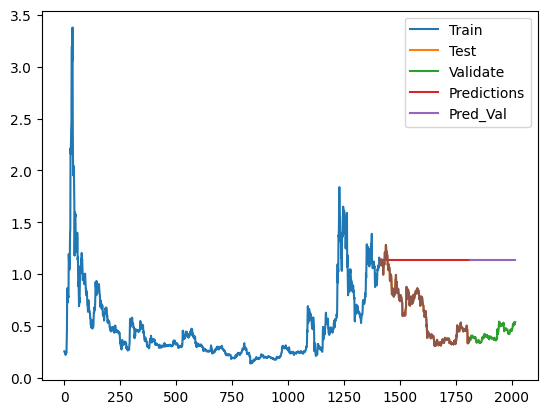

In [44]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(test_data.index, test_data['Close'])
# plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Pred_Val'])
plt.show()